# Linear Discriminant Analysis (LDA) in Machine Learning

## 1. Importing Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from matplotlib.colors import ListedColormap

## 2. Loading the Dataset
We load the Iris dataset and convert it into a Pandas DataFrame. Features X and target labels y are separated

* pd.DataFrame(columns=..., data=...) creates a DataFrame from raw data
* iloc[:, 0:4] selects first four columns as features
* iloc[:, 4] selects the target column

In [3]:
iris = load_iris()
dataset = pd.DataFrame(columns=iris.feature_names, data=iris.data)
dataset['target'] = iris.target

X = dataset.iloc[:, 0:4].values
y = dataset.iloc[:, 4].values

## 3. Data Preprocessing
We scale the features and encode the target labels, then split the dataset into training and testing sets

* StandardScaler().fit_transform(X) scales features
* LabelEncoder().fit_transform(y) encodes categorical labels as integers
* train_test_split(X, y, test_size=0.2, random_state=42) splits data into 80% train and 20% test

In [4]:
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

le = LabelEncoder()
y_encoded = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

## 4. Visualizing the Original Iris Dataset in 3D
We create a 3D scatter plot using the first three features to visualize the original data distribution

* Axes3D enables 3D plotting
* scatter(..., c=y, cmap='rainbow', alpha=0.7, edgecolors='b') colors points by class

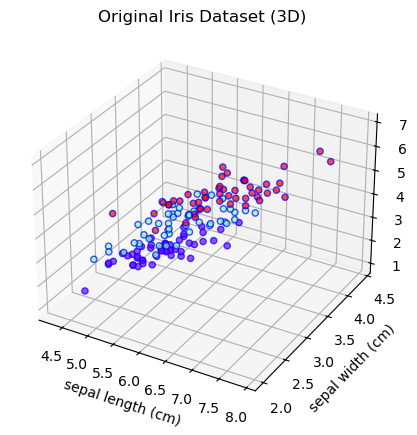

In [5]:
fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], X[:,2], c=y, cmap='rainbow', alpha=0.7, edgecolors='b')
ax.set_xlabel(iris.feature_names[0])
ax.set_ylabel(iris.feature_names[1])
ax.set_zlabel(iris.feature_names[2])
ax.set_title('Original Iris Dataset (3D)')
plt.show()

## 5. Random Forest Decision Boundary Without LDA
We train a Random Forest on the original features (first two features only for visualization) and plot the decision boundary

* RandomForestClassifier(max_depth=2, random_state=0) initialize classifier
* .fit(X_train_2D, y_train) train classifier
* .predict() predict over grid for decision boundary
* contourf() fills decision regions with colors

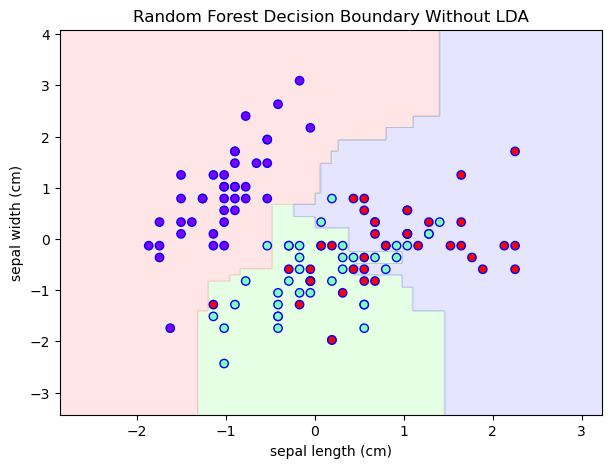

In [6]:
X_train_2D = X_train[:, :2]

rf_without_lda = RandomForestClassifier(max_depth=2, random_state=0)
rf_without_lda.fit(X_train_2D, y_train)

x_min, x_max = X_train_2D[:,0].min() - 1, X_train_2D[:,0].max() + 1
y_min, y_max = X_train_2D[:,1].min() - 1, X_train_2D[:,1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

Z = rf_without_lda.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])

plt.figure(figsize=(7,5))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=cmap_light)
plt.scatter(X_train_2D[:,0], X_train_2D[:,1], c=y_train, cmap='rainbow', edgecolors='b')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title('Random Forest Decision Boundary Without LDA')
plt.show()

## 6. Applying LDA
We reduce the feature space to 2 components to maximize class separability

* LinearDiscriminantAnalysis(n_components=2) reduces features to 2 components
* .fit_transform(X_train, y_train) fit LDA on training data and transform it
* .transform(X_test) project test data onto same LDA components

In [7]:
lda = LinearDiscriminantAnalysis(n_components=2)
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

## 7. Random Forest Decision Boundary With LDA
We train a Random Forest on LDA-transformed features and plot its decision boundary

* RandomForestClassifier(max_depth=2, random_state=0) initialize classifier
* .fit(X_train_lda, y_train) train classifier
* .predict() predict over grid for decision boundary
* contourf() fills decision regions with colors

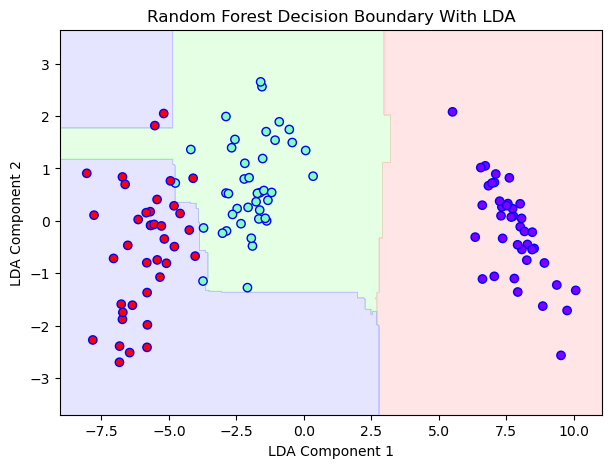

In [8]:
rf_with_lda = RandomForestClassifier(max_depth=2, random_state=0)
rf_with_lda.fit(X_train_lda, y_train)

x_min, x_max = X_train_lda[:,0].min() - 1, X_train_lda[:,0].max() + 1
y_min, y_max = X_train_lda[:,1].min() - 1, X_train_lda[:,1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

Z = rf_with_lda.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(7,5))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=cmap_light)
plt.scatter(X_train_lda[:,0], X_train_lda[:,1], c=y_train, cmap='rainbow', edgecolors='b')
plt.xlabel('LDA Component 1')
plt.ylabel('LDA Component 2')
plt.title('Random Forest Decision Boundary With LDA')
plt.show()